In [59]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [60]:
import os
from collections import defaultdict

# Paths to the relevant dataset directories
dataset_paths = {
    'Training Images': 'Data/Training/images',
    'Training Ground Truth': 'Data/Training/GT',
    'Testing Images': 'Data/Testing/images',
    'Testing Ground Truth': 'Data/Testing/GT'
}

# Function to count files
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Dictionary to hold the counts
file_counts = defaultdict(int)

# Loop through the dataset paths and count the files
for key, path in dataset_paths.items():
    file_counts[key] = count_files(path)

# Now we print out the counts and basic description
print("Dataset Contents and Counts:")
for key, count in file_counts.items():
    print(f"{key}: {count} files")

# If you want to print a more descriptive message
total_images = file_counts['Training Images'] + file_counts['Testing Images']
total_gt = file_counts['Training Ground Truth'] + file_counts['Testing Ground Truth']
print("\nDataset Description:")
print(f"The dataset contains a total of {total_images} images and {total_gt} ground truth files.")
print(f"Specifically, there are {file_counts['Training Images']} training images and {file_counts['Testing Images']} testing images.")
print(f"For the annotations, there are {file_counts['Training Ground Truth']} training ground truth files and {file_counts['Testing Ground Truth']} testing ground truth files.")


Dataset Contents and Counts:
Training Images: 748 files
Training Ground Truth: 748 files
Testing Images: 330 files
Testing Ground Truth: 330 files

Dataset Description:
The dataset contains a total of 1078 images and 1078 ground truth files.
Specifically, there are 748 training images and 330 testing images.
For the annotations, there are 748 training ground truth files and 330 testing ground truth files.


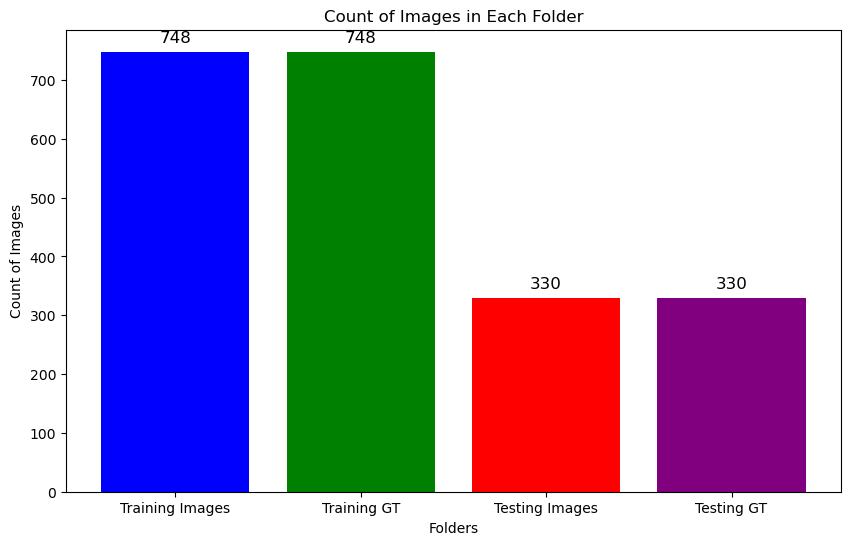

In [61]:
import os
import matplotlib.pyplot as plt

# Paths to the training and testing datasets
training_images_directory = 'Data/Training/images'
training_gt_directory = 'Data/Training/GT'
testing_images_directory = 'Data/Testing/images'
testing_gt_directory = 'Data/Testing/GT'

# Function to count the number of files in a directory
def count_files(directory):
    return len(os.listdir(directory))

# Count the number of images in each folder
training_images_count = count_files(training_images_directory)
training_gt_count = count_files(training_gt_directory)
testing_images_count = count_files(testing_images_directory)
testing_gt_count = count_files(testing_gt_directory)

# Create bar plots to show the counts
folders = ['Training Images', 'Training GT', 'Testing Images', 'Testing GT']
counts = [training_images_count, training_gt_count, testing_images_count, testing_gt_count]

plt.figure(figsize=(10, 6))
plt.bar(folders, counts, color=['blue', 'green', 'red', 'purple'])
plt.title('Count of Images in Each Folder')
plt.xlabel('Folders')
plt.ylabel('Count of Images')

# Add text labels with the counts above the bars
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


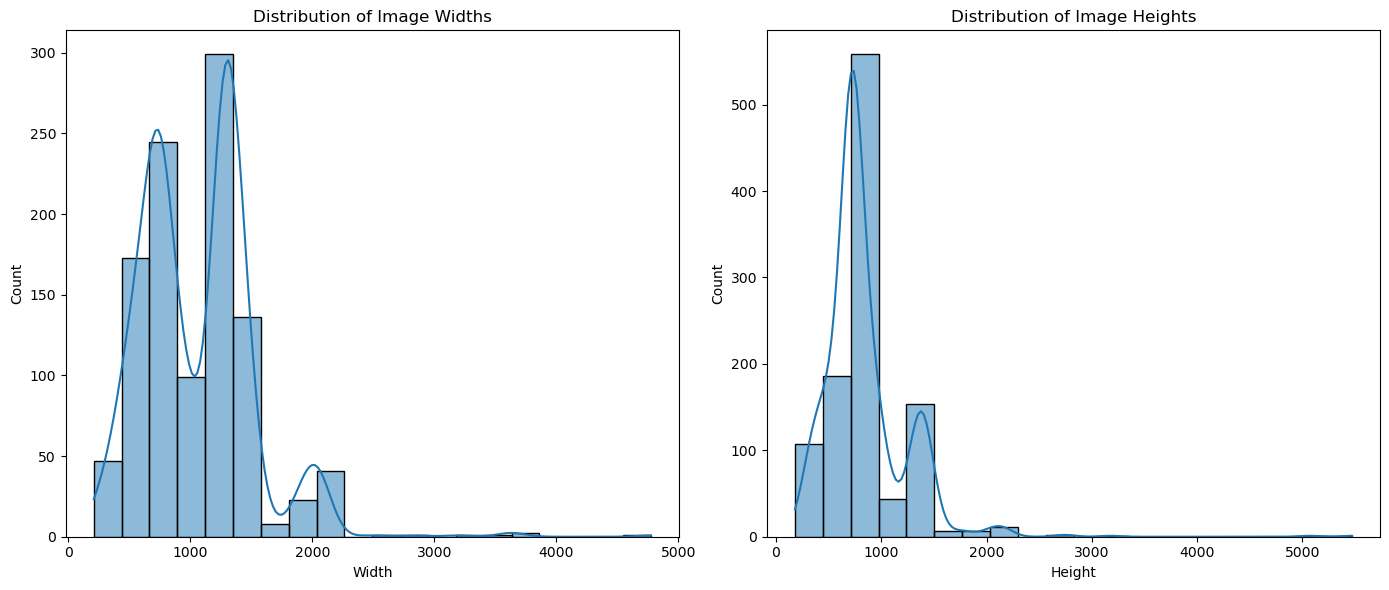

             Width       Height
count  1078.000000  1078.000000
mean   1054.990724   840.514842
std     459.907071   402.814047
min     209.000000   180.000000
25%     750.000000   649.500000
50%    1000.500000   720.000000
75%    1280.000000   960.000000
max    4775.000000  5472.000000
Total number of images: 1078


In [62]:

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

# Path to the training and testing dataset directories
training_directory = 'Data/Training/images'
testing_directory = 'Data/Testing/images'

# Walk through the dataset directory to list all image files
image_files = []
for directory in [training_directory, testing_directory]:
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

# Get dimensions of all images
image_dimensions = [get_image_dimensions(image) for image in image_files]

# Convert the list of dimensions into a pandas DataFrame
df_image_dimensions = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])

# Display basic statistics about image dimensions
dimension_stats = df_image_dimensions.describe()

# Plotting the distribution of image dimensions
plt.figure(figsize=(14, 6))

# Histogram for Width
plt.subplot(1, 2, 1)
sns.histplot(df_image_dimensions['Width'], bins=20, kde=True)
plt.title('Distribution of Image Widths')

# Histogram for Height
plt.subplot(1, 2, 2)
sns.histplot(df_image_dimensions['Height'], bins=20, kde=True)
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()


# Output the statistics and the number of images
print(dimension_stats)
print(f'Total number of images: {len(image_files)}')


In [63]:
import os
from PIL import Image
import pandas as pd

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

# Paths to the images dataset directories
training_images_directory = 'Data/Training/images'
testing_images_directory = 'Data/Testing/images'

# Dictionary to hold the image dimensions
image_dimensions = {'Training': [], 'Testing': []}

# Collect image dimensions from the training images
for image_file in os.listdir(training_images_directory):
    image_path = os.path.join(training_images_directory, image_file)
    if os.path.isfile(image_path):
        image_dimensions['Training'].append(get_image_dimensions(image_path))

# Collect image dimensions from the testing images
for image_file in os.listdir(testing_images_directory):
    image_path = os.path.join(testing_images_directory, image_file)
    if os.path.isfile(image_path):
        image_dimensions['Testing'].append(get_image_dimensions(image_path))

# Convert the lists of dimensions into a pandas DataFrame
df_training_dimensions = pd.DataFrame(image_dimensions['Training'], columns=['Width', 'Height'])
df_testing_dimensions = pd.DataFrame(image_dimensions['Testing'], columns=['Width', 'Height'])

# Combine both DataFrames for a full dataset summary
df_full_dimensions = pd.concat([df_training_dimensions.assign(Dataset='Training'), df_testing_dimensions.assign(Dataset='Testing')])

# Count the unique dimensions for both training and testing datasets
unique_dimensions_count = df_full_dimensions.groupby(['Width', 'Height', 'Dataset']).size().reset_index(name='Count')

# Sort the counts in descending order
unique_dimensions_count_sorted = unique_dimensions_count.sort_values(by='Count', ascending=False)

# Print out the sorted counts of each unique dimension found
print(unique_dimensions_count_sorted)


     Width  Height   Dataset  Count
354   1280     720  Training    181
353   1280     720   Testing     74
190    750     750  Training     44
381   1440    1440  Training     43
189    750     750   Testing     33
..     ...     ...       ...    ...
154    720     556  Training      1
153    720     482  Training      1
152    720     430  Training      1
149    700     467   Testing      1
419   4775    3178  Training      1

[420 rows x 4 columns]


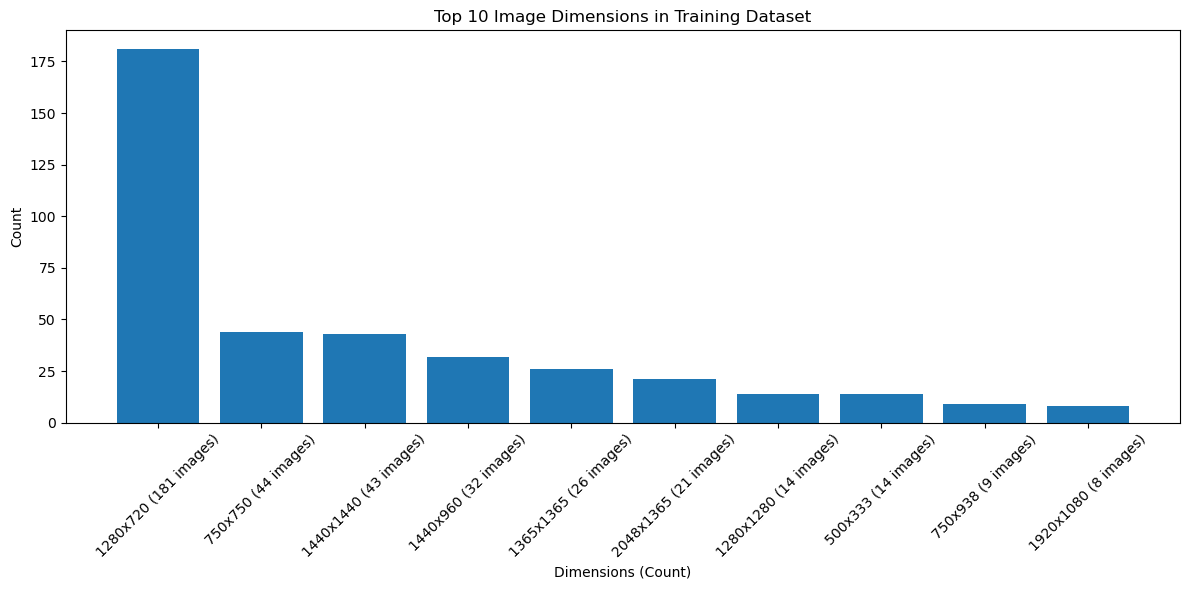

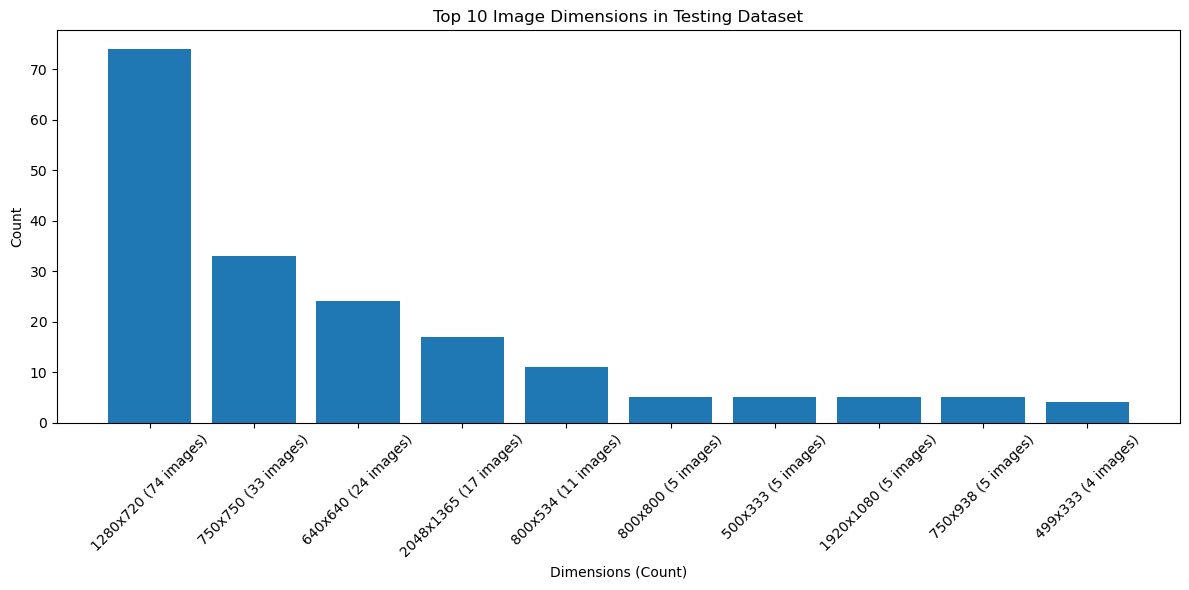

In [67]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

# Paths to the images dataset directories
training_images_directory = 'Data/Training/images'
testing_images_directory = 'Data/Testing/images'

# Dictionary to hold the image dimensions
image_dimensions = {'Training': [], 'Testing': []}

# Collect image dimensions from the training images
for image_file in os.listdir(training_images_directory):
    image_path = os.path.join(training_images_directory, image_file)
    if os.path.isfile(image_path):
        image_dimensions['Training'].append(get_image_dimensions(image_path))

# Collect image dimensions from the testing images
for image_file in os.listdir(testing_images_directory):
    image_path = os.path.join(testing_images_directory, image_file)
    if os.path.isfile(image_path):
        image_dimensions['Testing'].append(get_image_dimensions(image_path))

# Convert the lists of dimensions into a pandas DataFrame
df_training_dimensions = pd.DataFrame(image_dimensions['Training'], columns=['Width', 'Height'])
df_testing_dimensions = pd.DataFrame(image_dimensions['Testing'], columns=['Width', 'Height'])

# Combine both DataFrames for a full dataset summary
df_full_dimensions = pd.concat([df_training_dimensions.assign(Dataset='Training'), df_testing_dimensions.assign(Dataset='Testing')])

# Count the unique dimensions for both training and testing datasets
unique_dimensions_count = df_full_dimensions.groupby(['Width', 'Height', 'Dataset']).size().reset_index(name='Count')

# Sort the counts in descending order
unique_dimensions_count_sorted = unique_dimensions_count.sort_values(by='Count', ascending=False)

# Plot the top 10 unique dimensions for each dataset
top_dimensions_training = unique_dimensions_count_sorted[unique_dimensions_count_sorted['Dataset'] == 'Training'].head(10)
top_dimensions_testing = unique_dimensions_count_sorted[unique_dimensions_count_sorted['Dataset'] == 'Testing'].head(10)

# Plot top dimensions for training dataset with count
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_dimensions_training)), top_dimensions_training['Count'], tick_label=top_dimensions_training.apply(lambda x: f"{x['Width']}x{x['Height']} ({x['Count']} images)", axis=1))
plt.title('Top 10 Image Dimensions in Training Dataset')
plt.xlabel('Dimensions (Count)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top dimensions for testing dataset with count
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_dimensions_testing)), top_dimensions_testing['Count'], tick_label=top_dimensions_testing.apply(lambda x: f"{x['Width']}x{x['Height']} ({x['Count']} images)", axis=1))
plt.title('Top 10 Image Dimensions in Testing Dataset')
plt.xlabel('Dimensions (Count)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


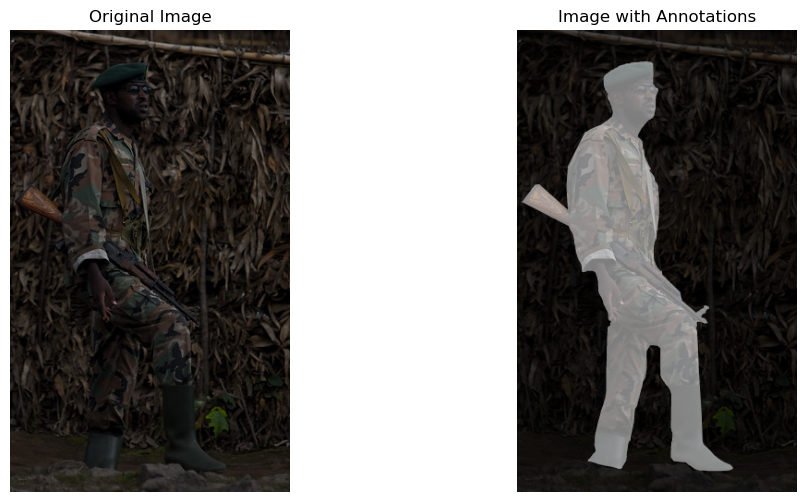

In [65]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Directory paths for images and ground truth annotations
images_directory = 'Data/Training/images'  # Update with the appropriate path
annotations_directory = 'Data/Training/GT'  # Update with the appropriate path

# Function to display an image with annotations
def display_image_with_annotations(image_path, annotation_path):
    # Open the image and annotation
    image = Image.open(image_path)
    annotation = Image.open(annotation_path)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the original image
    ax1.imshow(image)
    ax1.set_title('Original Image')
    
    # Display the annotation overlay
    ax2.imshow(image)
    ax2.imshow(annotation, alpha=0.5, cmap='gray')
    ax2.set_title('Image with Annotations')
    
    # Ensure the aspect ratio is maintained
    ax1.axis('off')
    ax2.axis('off')
    
    plt.show()

# List of image and annotation files (assuming the file names match)
image_files = sorted(os.listdir(images_directory))
annotation_files = sorted(os.listdir(annotations_directory))

# Visualize a random image with annotations
random_index = 0  # Change to any index you want to visualize
random_image_path = os.path.join(images_directory, image_files[random_index])
random_annotation_path = os.path.join(annotations_directory, annotation_files[random_index])

# Display the image with annotations
display_image_with_annotations(random_image_path, random_annotation_path)


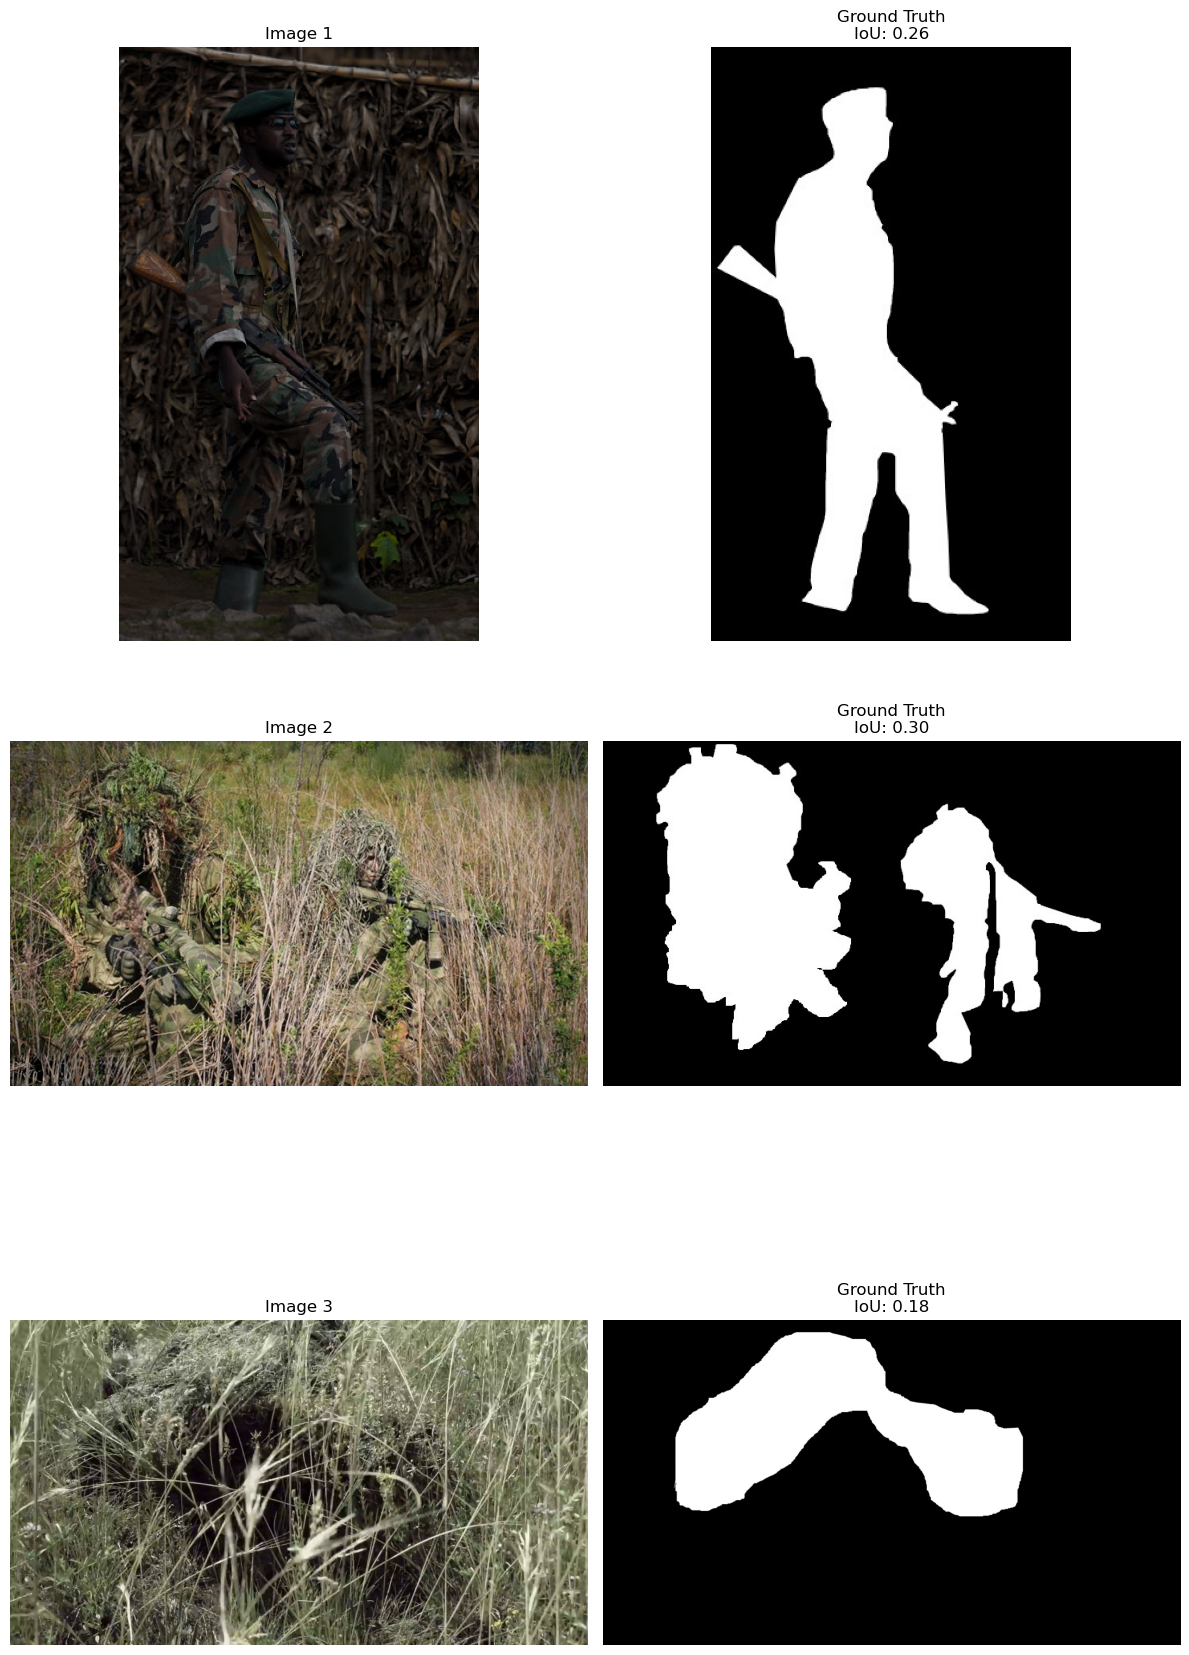

IoU for image 1: 0.26
IoU for image 2: 0.30
IoU for image 3: 0.18


In [66]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directory paths for images and ground truth annotations
images_directory = 'Data/Training/images'  # Update with the appropriate path
annotations_directory = 'Data/Training/GT'  # Update with the appropriate path

# Number of images to calculate IoU for and display
num_images_to_display = 3  # Change to the desired number of images

# Function to calculate Intersection over Union (IoU)
def calculate_iou(annotation, prediction):
    intersection = np.logical_and(annotation, prediction)
    union = np.logical_or(annotation, prediction)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Calculate IoU scores and display images
iou_scores = []

# List of image files and corresponding annotation files
image_files = sorted(os.listdir(images_directory))
annotation_files = sorted(os.listdir(annotations_directory))

# Create subplots
fig, axs = plt.subplots(num_images_to_display, 2, figsize=(12, 6 * num_images_to_display))

# Iterate over a subset of images
for i in range(num_images_to_display):
    # Load the image and annotation
    image_path = os.path.join(images_directory, image_files[i])
    annotation_path = os.path.join(annotations_directory, annotation_files[i])
    
    image = np.array(Image.open(image_path))
    annotation = np.array(Image.open(annotation_path))
    
    # Ensure the images have the same dimensions
    if image.shape[:2] != annotation.shape[:2]:
        raise ValueError("Image and annotation dimensions do not match.")
    
    # Calculate IoU
    iou = calculate_iou(annotation, image)
    iou_scores.append(iou)
    
    # Display the image with annotation and IoU score
    axs[i, 0].imshow(image)
    axs[i, 0].set_title(f"Image {i + 1}")
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(annotation, cmap='gray')
    axs[i, 1].set_title(f"Ground Truth\nIoU: {iou:.2f}")
    axs[i, 1].axis('off')

# Adjust subplot layout
plt.tight_layout()
plt.show()

# Print IoU scores
for i, iou in enumerate(iou_scores):
    print(f"IoU for image {i + 1}: {iou:.2f}")
